# XML Schema

<bibliography xmlns="http://something.something.my.schema" version="0.1" >

        <item type="journal article">  
                <autor>John Smith</author>
                <autor>James Davis</author>
                <title>Methodology of science</title>
                <journal>Scientific letters</journal>
                <volume>14</volume>
                <pages>1034-1040</pages>
                <year>2012</year>
        </item>
        
        <item type="book">  
                <autor>Mary Jones</author>
                <title>My life</title>
                <publisher>Jones Publishing Co.</publisher>
                <publisher>Jones Publishing Co.</publisher>
                <pages>345</pages>
                <year>1890</year>
        </item>


        <item type="thesis">  
                <autor>Vincent Vega</author>
                <title>History of Florence years 1200-1300</title>
                <college>University of Great Science</college>
                <pages>127</pages>
                <year>1890</year>
        </item>

        </course>

</bibliography>

In [50]:
import xmlschema

try:
    xmlschema.validate('mydoc.xml','myschema.xsd')
except xmlschema.XMLSchemaValidationError as e:
    print(e.obj, e.reason)
    

MTH448 value doesn't match any pattern of ['[A-Z]{3} [0-9]{3}'].


# Regular expressions

In [58]:
import re

re.findall(r'(\w)at', "the cat sat on the mat")

['c', 's', 'm']

# JSON

In [76]:
import json




def get_notebook(nb_file, save=False):
    """
    Retrieves Python code from a Jupyter notebook file
    
    :nb_file:
        The name of an ipynb file
    :code_file:
        The name of the file where the code is to be saved. 
        If None nothing will be saved
    Returns:
        A string with the code
    """
    
    def format_cell(c):
        if c['cell_type'] == 'code':
            return "# " + "In[{}]:".format(c['execution_count']) + "\n" + ''.join(c['source'])
        if c['cell_type'] == 'markdown':
            return "# " + "# ".join(c['source'])
    
    with open(nb_file) as foo:
        notebook = json.load(foo)
    cells = notebook['cells']
    
    cell_str = [format_cell(c) for c in cells] 
    s = '\n\n'.join(cell_str)
    if save:
        fname = nb_file[:nb_file.find(".ipynb")]
        with open(fname + '.py', 'w') as foo:
            foo.write(s)
    return s

In [77]:
get_notebook("mth448_week5.ipynb", save=True);

# NHTSA complaints database

In [38]:
import requests
import json
url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=json'
year,make,model = '2009','Chevrolet','Cobalt'
url = url0.format(year,make,model)
s = requests.get(url).text  # a JSON string
complaints = json.loads(s)

In [39]:
complaints

{'Count': 569,
 'Message': 'Results returned successfully',
 'Results': [{'ODINumber': 11257321,
   'Manufacturer': 'General Motors LLC',
   'Crash': 'No',
   'Fire': 'No',
   'NumberOfInjured': 0,
   'NumberOfDeaths': 0,
   'DateofIncident': '/Date(1566360000000-0400)/',
   'DateComplaintFiled': '/Date(1569252077000-0400)/',
   'VIN': '1G1AT18H697',
   'Component': 'ENGINE | FUEL/PROPULSION SYSTEM',
   'Summary': 'TL- THE CONTACT OWNS A 2009 CHEVROLET COBALT. THE CONTACT STATED THAT UPON EXITING HIS VEHICLE, HE COULD SMELL GAS COMING FROM THE VEHICLE; UPON FURTHER DISCOVERY, HE NOTICED THAT FUEL WAS LEAKING FROM FUEL TANK.  THE CONTACT STATED THAT HE HAD COME ACROSS AN ARTICLE WHERE IT MENTIONED THAT PLASTIC SUPPLY OR RETURN PORT ON THE FUEL PUMP CAN BREAK OFF AND POTENTIALLY CAUSE A FIRE; THE FAILURE CAN OCCUR IN THE VEHICLE WHEN VEHICLES ARE IN HIGH HUMIDITY CLIMATES. UPON FURTHER INVESTIGATION, CONTACT DISCOVERED NHTSA CAMPAIGN NUMBER: 12V459000( FUEL SYSTEM, GASOLINE) WHICH WAS TH

In [69]:
year_min = 1980
year_max = 2018
make = 'Hyundai'
model = 'Sonata'

def count_complaints(make, model, year_min, year_max):
    complaint_count = {}
    for year in range(year_min, year_max + 1):
        url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=json'
        url = url0.format(year,make,model)
        s = requests.get(url).text  # a JSON string
        complaints = json.loads(s)
        if complaints['Message'] == 'No results found for this request':
            count = -1
        else:
            count = complaints['Count']
        complaint_count[year] = count
    
    return complaint_count

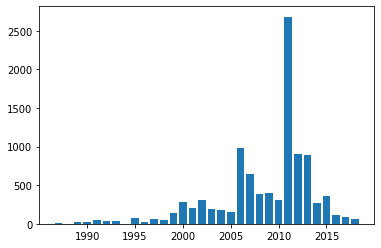

In [82]:
import matplotlib.pyplot as plt

year_min = 1980
year_max = 2018
make = 'Hyundai'
model = 'Sonata'


count = count_complaints(make, model, year_min, year_max)

count = {year:count[year] for year in count if count[year] >= 0}
plt.bar(*zip(*count.items()))
plt.show()

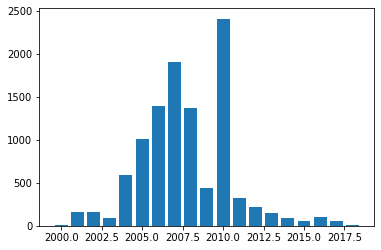

In [83]:
import matplotlib.pyplot as plt

year_min = 2000
year_max = 2018
make = 'Toyota'
model = 'Prius'

count = count_complaints(make, model, year_min, year_max)
plt.bar(*zip(*count.items()))
plt.show()

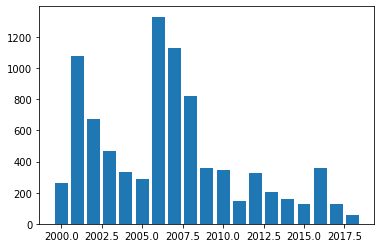

In [85]:
import matplotlib.pyplot as plt

year_min = 2000
year_max = 2018
make = 'Honda'
model = 'Civic'

count = count_complaints(make, model, year_min, year_max)
plt.bar(*zip(*count.items()))
plt.show()

In [84]:
import datetime
datetime.datetime.fromtimestamp(1284286794)

datetime.datetime(2010, 9, 12, 6, 19, 54)

In [87]:
year = 2010
make = 'Toyota'
model = 'Prius'
url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=json'
url = url0.format(year,make,model)
s = requests.get(url).text  # a JSON string
complaints = json.loads(s)

In [88]:
complaints

{'Count': 2409,
 'Message': 'Results returned successfully',
 'Results': [{'ODINumber': 11244591,
   'Manufacturer': 'Toyota Motor Corporation',
   'Crash': 'Yes',
   'Fire': 'No',
   'NumberOfInjured': 0,
   'NumberOfDeaths': 0,
   'DateofIncident': '/Date(1564632000000-0400)/',
   'DateComplaintFiled': '/Date(1566052607000-0400)/',
   'VIN': 'JTDKN3DUXA0',
   'Component': 'SERVICE BRAKES',
   'Summary': 'BRAKE FAILURE AND CAR WENT UP CURB, KNOCKED DOWN STAIR RAIL, HIT TREE AND TURNED OVER ON SIDE',
   'ProductType': 'VEHICLE',
   'ModelYear': '2010',
   'Make': 'TOYOTA',
   'Model': 'PRIUS'},
  {'ODINumber': 10940000,
   'Manufacturer': 'Toyota Motor Corporation',
   'Crash': 'No',
   'Fire': 'No',
   'NumberOfInjured': 0,
   'NumberOfDeaths': 0,
   'DateofIncident': '/Date(1482123600000-0500)/',
   'DateComplaintFiled': '/Date(1483592400000-0500)/',
   'VIN': 'JTDKN3DU7A1',
   'Component': 'SERVICE BRAKES',
   'Summary': 'TL* THE CONTACTS OWNS A 2010 TOYOTA PRIUS. THE CONTACT STATED

In [89]:
res = complaints['Results']

In [90]:
res

[{'ODINumber': 11244591,
  'Manufacturer': 'Toyota Motor Corporation',
  'Crash': 'Yes',
  'Fire': 'No',
  'NumberOfInjured': 0,
  'NumberOfDeaths': 0,
  'DateofIncident': '/Date(1564632000000-0400)/',
  'DateComplaintFiled': '/Date(1566052607000-0400)/',
  'VIN': 'JTDKN3DUXA0',
  'Component': 'SERVICE BRAKES',
  'Summary': 'BRAKE FAILURE AND CAR WENT UP CURB, KNOCKED DOWN STAIR RAIL, HIT TREE AND TURNED OVER ON SIDE',
  'ProductType': 'VEHICLE',
  'ModelYear': '2010',
  'Make': 'TOYOTA',
  'Model': 'PRIUS'},
 {'ODINumber': 10940000,
  'Manufacturer': 'Toyota Motor Corporation',
  'Crash': 'No',
  'Fire': 'No',
  'NumberOfInjured': 0,
  'NumberOfDeaths': 0,
  'DateofIncident': '/Date(1482123600000-0500)/',
  'DateComplaintFiled': '/Date(1483592400000-0500)/',
  'VIN': 'JTDKN3DU7A1',
  'Component': 'SERVICE BRAKES',
  'Summary': 'TL* THE CONTACTS OWNS A 2010 TOYOTA PRIUS. THE CONTACT STATED THAT THE BRAKES TRAVELED TO THE FLOOR WHEN THE BRAKE PEDAL WAS DEPRESSED AND THE VEHICLE DID NOT 

In [92]:
r = res[0]
r

{'ODINumber': 11244591,
 'Manufacturer': 'Toyota Motor Corporation',
 'Crash': 'Yes',
 'Fire': 'No',
 'NumberOfInjured': 0,
 'NumberOfDeaths': 0,
 'DateofIncident': '/Date(1564632000000-0400)/',
 'DateComplaintFiled': '/Date(1566052607000-0400)/',
 'VIN': 'JTDKN3DUXA0',
 'Component': 'SERVICE BRAKES',
 'Summary': 'BRAKE FAILURE AND CAR WENT UP CURB, KNOCKED DOWN STAIR RAIL, HIT TREE AND TURNED OVER ON SIDE',
 'ProductType': 'VEHICLE',
 'ModelYear': '2010',
 'Make': 'TOYOTA',
 'Model': 'PRIUS'}

In [104]:
import re
re.findall("\((.*)-", r['DateComplaintFiled'])

['1566052607000']

In [108]:
import datetime
datetime.datetime.fromtimestamp(1564632000)

datetime.datetime(2019, 8, 1, 0, 0)

In [109]:
datetime.datetime.fromtimestamp(0)

datetime.datetime(1969, 12, 31, 19, 0)